[*********************100%***********************]  5 of 5 completed


Data saved to data/20251004-002033.csv
Price                            Open        High         Low       Close  \
Datetime                                                                    
2025-09-29 13:30:00+00:00  254.000000  254.500000  253.009995  254.219894   
2025-09-29 14:30:00+00:00  254.205002  254.240005  253.309998  253.470001   
2025-09-29 15:30:00+00:00  253.466507  254.070007  253.119995  253.660004   
2025-09-29 16:30:00+00:00  253.669998  253.779907  253.210007  253.399994   
2025-09-29 17:30:00+00:00  253.389999  254.615005  253.130005  254.570007   

Price                       Volume  
Datetime                            
2025-09-29 13:30:00+00:00  6306062  
2025-09-29 14:30:00+00:00  2834864  
2025-09-29 15:30:00+00:00  2275242  
2025-09-29 16:30:00+00:00  1744854  
2025-09-29 17:30:00+00:00  2297052  


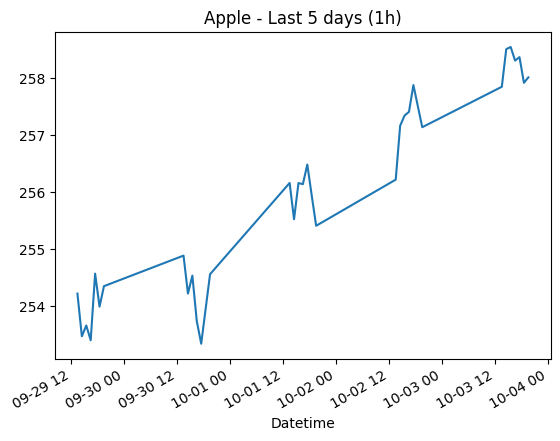

In [17]:
"""
Using the yfinance Python package, write a function called get_data() 
that downloads all hourly data for the previous five days for the five FAANG stocks:
"""

import yfinance as yf
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

def get_data():
    """
    Download hourly stock data for the past 5 days 
    for the five FAANG companies: Meta (Facebook), Apple, Amazon,
    Netflix, and Alphabet (Google), and save it to a CSV file.

    Returns:
        pd.DataFrame: Hourly stock data for all FAANG companies.
    """
    # FAANG tickers
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]

    # Download 5 days of data at 1-hour intervals
    data = yf.download(
        tickers=tickers,
        period="5d",
        interval="1h",
        group_by="ticker",   # Organize data by company
        auto_adjust=True,    # Adjust prices for dividends/splits
        threads=True         # Download in parallel
    )

    # Create 'data' folder if it doesn't exist
    if not os.path.exists("data"):
        os.makedirs("data")

    # Create filename with current date and time
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filename = f"data/{timestamp}.csv"

    # Save the data to CSV
    data.to_csv(filename)
    print(f"Data saved to {filename}")

    return data


# Run the function and store the data
df = get_data()

# Display the first rows of Apple data
print(df["AAPL"].head())

# Example of plotting the closing price
df["AAPL"]["Close"].plot(title="Apple - Last 5 days (1h)")
plt.show()



